In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [3]:
# Load the CSV file

data = pd.read_csv('/content/Superstore_Data_csv')

In [4]:
data.head()

,Id,Year_Birth,Marital_Status,Income,MntWines,MntMeatProducts,MntSweetProducts,MntGoldProds,NumWebPurchases
0,1826,1970,Divorced,84835.0,189,379,189,218,45
1,1,1961,Single,57091.0,464,64,0,37,45
2,10476,1958,Married,67267.0,134,59,2,30,45
3,1386,1967,Together,32474.0,10,1,0,0,45
4,5371,1989,Single,21474.0,6,24,0,34,45


In [5]:
data.shape

(2240, 9)

In [6]:
# Check Null Values
data.isnull().values.any()

np.True_

In [7]:
print("There is {} missing values in data frame".format(data.isnull().sum().sum()))

There is 24 missing values in data frame


In [8]:
print("There is {} duplicated values in data frame".format(data.duplicated().sum()))

There is 0 duplicated values in data frame


In [9]:
len(data.columns)

9

In [10]:
data.describe()

,Id,Year_Birth,Income,MntWines,MntMeatProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,303.935714,166.950000,27.062946,44.021875
std,3246.662198,11.984069,25173.076661,336.597393,225.715373,41.280498,52.167439
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,23.750000,16.000000,1.000000,9.000000
50%,5458.500000,1970.000000,51381.500000,173.500000,67.000000,8.000000,24.000000
75%,8427.750000,1977.000000,68522.000000,504.250000,232.000000,33.000000,56.000000
max,11191.000000,1996.000000,666666.000000,1493.000000,1725.000000,263.000000,362.000000


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Define columns to plot: exclude categorical columns
numerical_columns = ['Id','Year_Birth', 'Income', 'MntWines', 'MntMeatProducts','MntSweetProducts','MntGoldProds','NumWebPurchases']

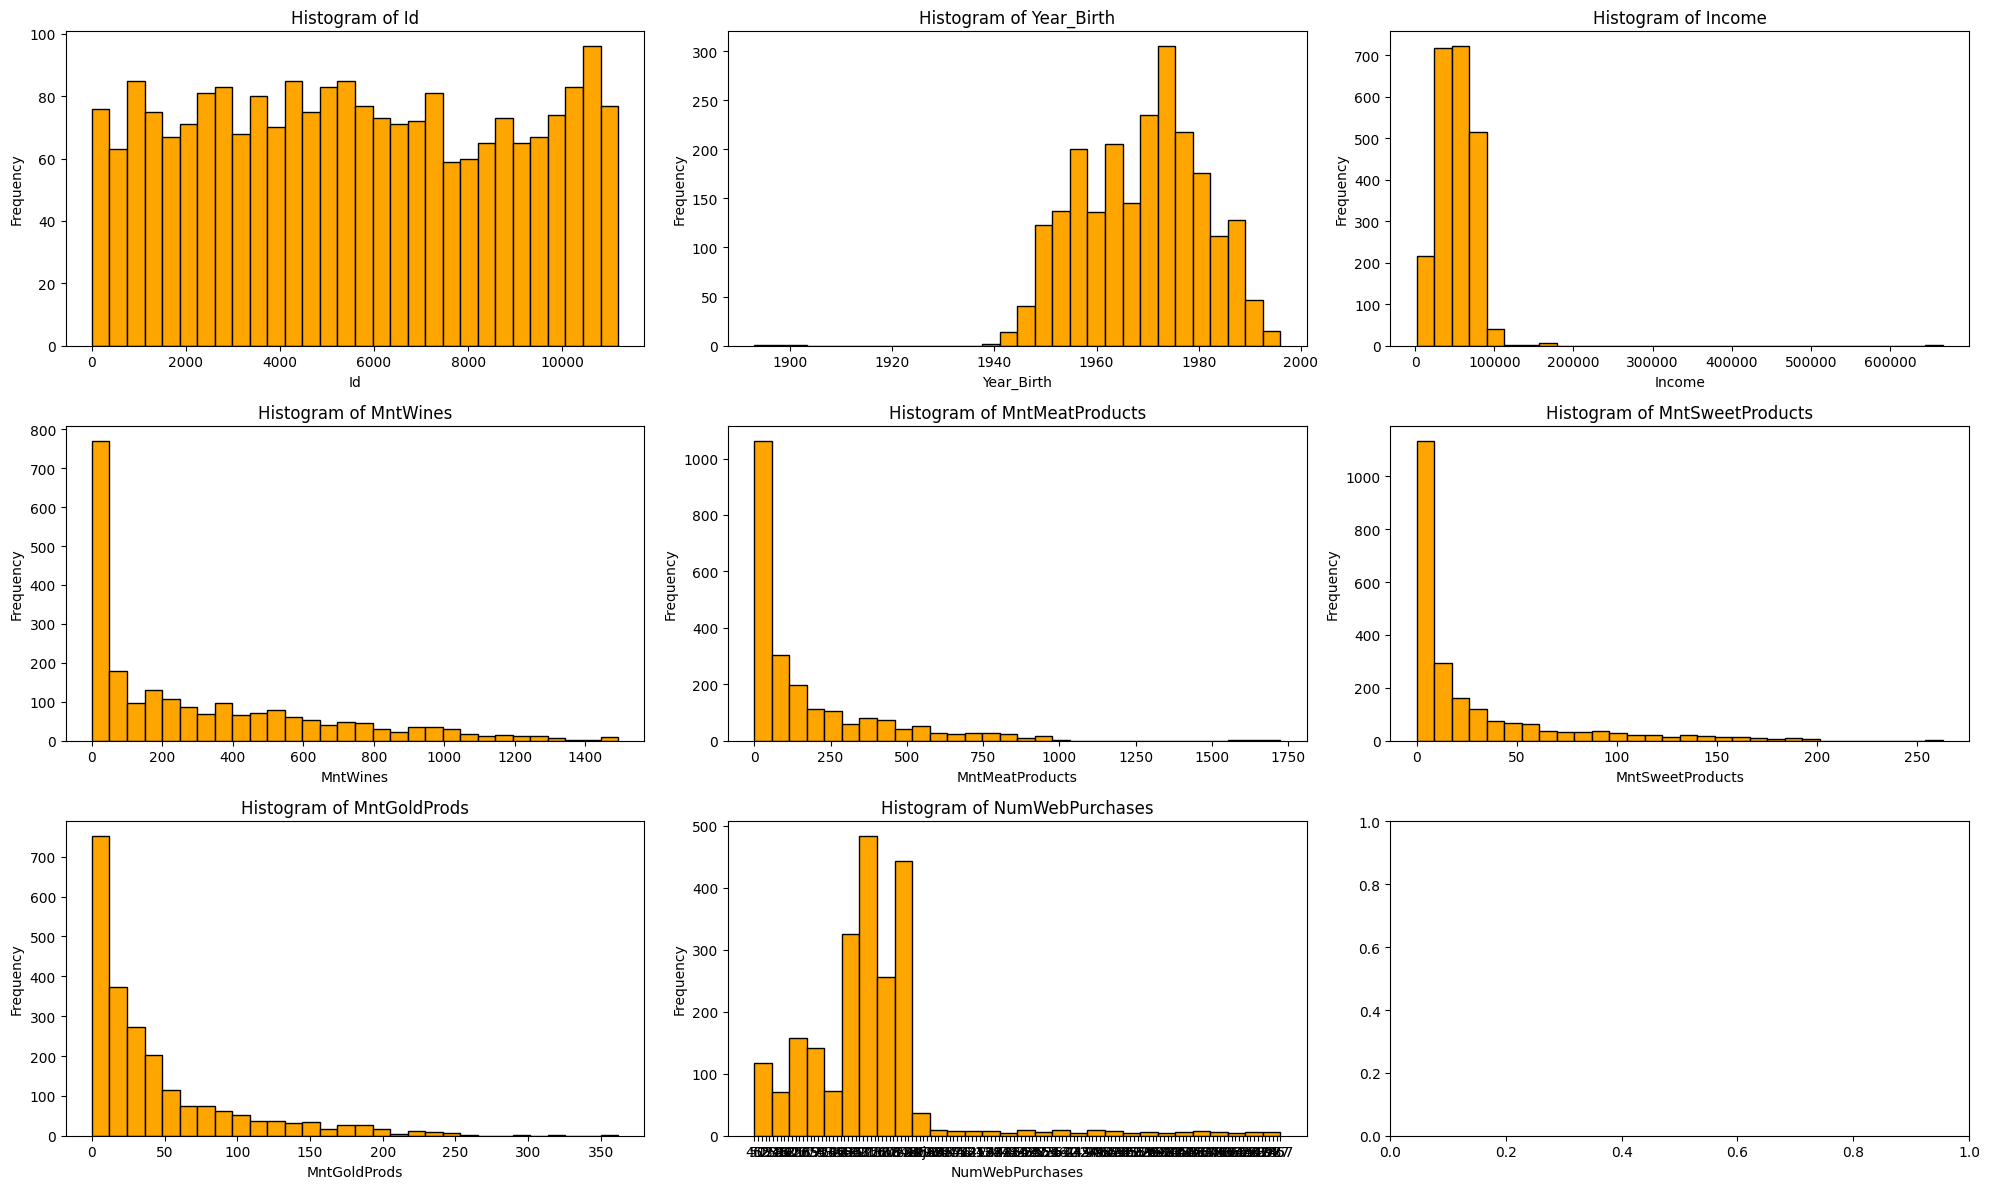

In [13]:
# Create a 3x3 grid for the plots
fig, axes = plt.subplots(3, 3, figsize=(20, 12))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Loop through the numerical columns and plot the histograms and column charts
for i, column in enumerate(numerical_columns):
    # Plot histogram
    axes[i].hist(data[column], bins=30, color='orange', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

/tmp/ipython-input-2183840604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Marital_Status', palette='Set2')


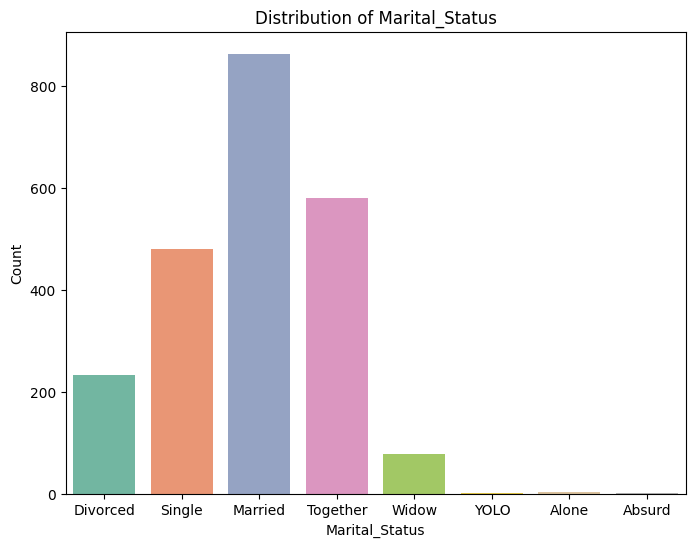

In [14]:
# Create a histogram for the 'Marital_Status' variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Marital_Status', palette='Set2')
plt.title('Distribution of Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.show()

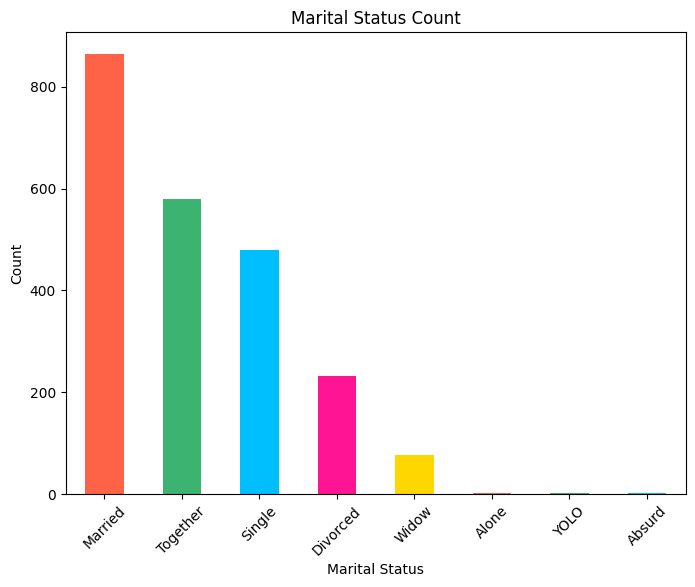

In [15]:
# Create a column chart for the 'Marital_Status' variable
plt.figure(figsize=(8, 6))
Marital_Status_counts = data['Marital_Status'].value_counts()
Marital_Status_counts.plot(kind='bar', color=['#FF6347', '#3CB371', '#00BFFF', '#FF1493', '#FFD700'])
plt.title('Marital Status Count')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

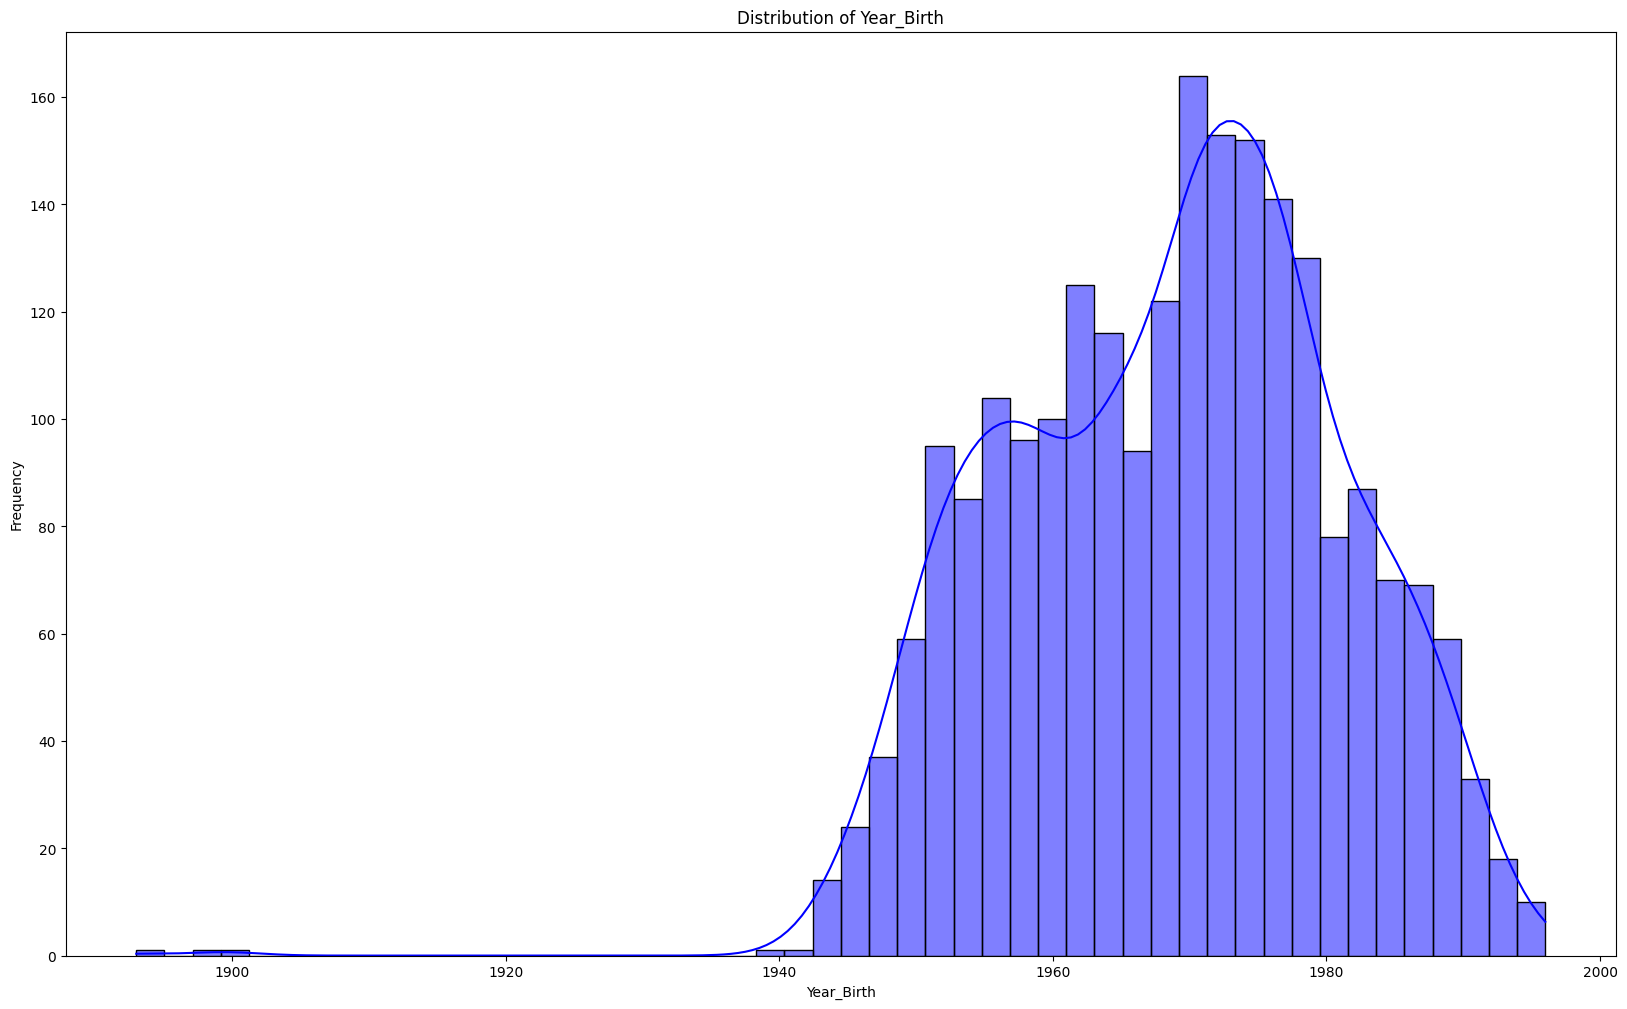

In [16]:
# Check distribution of the target variable
plt.figure(figsize=(20, 12))
sns.histplot(data['Year_Birth'], kde=True, color='blue', bins=50)
plt.title('Distribution of Year_Birth')
plt.xlabel('Year_Birth')
plt.ylabel('Frequency')
plt.show()

In [17]:
correlation_matrix = data.corr(numeric_only=True)

In [18]:
correlation_matrix

,Id,Year_Birth,Income,MntWines,MntMeatProducts,MntSweetProducts,MntGoldProds
Id,1.000000,0.000028,0.013095,-0.022878,-0.004437,-0.007642,-0.013438
Year_Birth,0.000028,1.000000,-0.161791,-0.157773,-0.030872,-0.018133,-0.061818
Income,0.013095,-0.161791,1.000000,0.578650,0.584633,0.440744,0.325916
MntWines,-0.022878,-0.157773,0.578650,1.000000,0.562667,0.386581,0.387516
MntMeatProducts,-0.004437,-0.030872,0.584633,0.562667,1.000000,0.523846,0.350609
MntSweetProducts,-0.007642,-0.018133,0.440744,0.386581,0.523846,1.000000,0.369724
MntGoldProds,-0.013438,-0.061818,0.325916,0.387516,0.350609,0.369724,1.000000


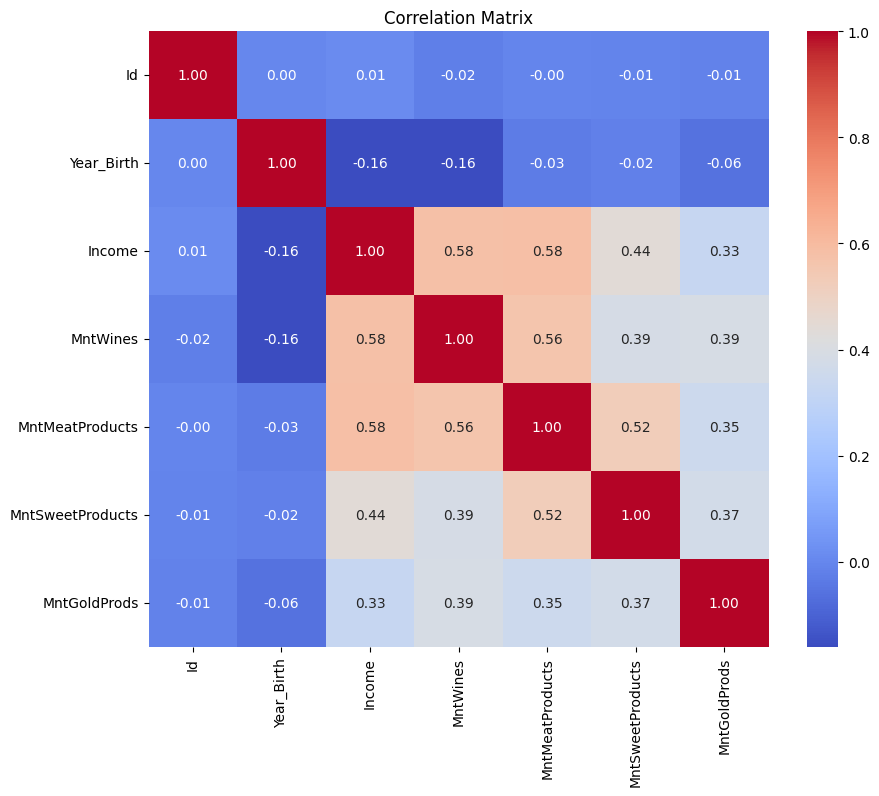

In [19]:
# Check correlations between numeric variables
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [20]:
# Check for missing values
missing_values = data.isnull().sum()

In [21]:
missing_values

,0
Id,0
Year_Birth,0
Marital_Status,0
Income,24
MntWines,0
MntMeatProducts,0
MntSweetProducts,0
MntGoldProds,0
NumWebPurchases,0


In [22]:
# Initialize the SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='mean')

# Fit and transform the 'Income' column (or apply to the whole dataset)
data['Income'] = imputer.fit_transform(data[['Income']])

# Print the data after imputation
print(data)

         Id  Year_Birth Marital_Status   Income  MntWines  MntMeatProducts  \
0      1826        1970       Divorced  84835.0       189              379   
1         1        1961         Single  57091.0       464               64   
2     10476        1958        Married  67267.0       134               59   
3      1386        1967       Together  32474.0        10                1   
4      5371        1989         Single  21474.0         6               24   
...     ...         ...            ...      ...       ...              ...   
2235  10142        1976       Divorced  66476.0       372              126   
2236   5263        1977        Married  31056.0         5               13   
2237     22        1976       Divorced  46310.0       185               88   
2238    528        1978        Married  65819.0       267              701   
2239   4070        1969        Married  94871.0       169              553   

      MntSweetProducts  MntGoldProds NumWebPurchases  
0       

In [23]:
# Check for any missing values after imputation
data.isnull().sum()

,0
Id,0
Year_Birth,0
Marital_Status,0
Income,0
MntWines,0
MntMeatProducts,0
MntSweetProducts,0
MntGoldProds,0
NumWebPurchases,0


In [24]:
from sklearn.preprocessing import OneHotEncoder

# Use sparse_output=False (recommended for newer scikit-learn versions)
encoder = OneHotEncoder(sparse_output=False)
encoded_Marital_Status = encoder.fit_transform(data[['Marital_Status']])

In [25]:
encoded_Marital_Status

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
# If you want to include the encoded categorical column in correlations
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(data[['Marital_Status']])

# Create DataFrame from encoded data
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Marital_Status']))

# Combine with numeric data
numeric_data = data.select_dtypes(include=['float64', 'int64'])
all_data = pd.concat([numeric_data, encoded_df], axis=1)

# Now calculate correlations
correlation_matrix = all_data.corr()

In [27]:
# Check Null Values
all_data.isnull().values.any()

np.False_

In [28]:
# Check for missing values
missing_values = all_data.isnull().sum()

In [29]:
missing_values

,0
Id,0
Year_Birth,0
Income,0
MntWines,0
MntMeatProducts,0
MntSweetProducts,0
MntGoldProds,0
Marital_Status_Absurd,0
Marital_Status_Alone,0
Marital_Status_Divorced,0


In [30]:
all_data.shape

(2240, 15)

In [31]:
len(all_data.columns)

15

In [32]:
all_data.describe()

,Id,Year_Birth,Income,MntWines,MntMeatProducts,MntSweetProducts,MntGoldProds,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,303.935714,166.950000,27.062946,44.021875,0.000893,0.001339,0.103571,0.385714,0.214286,0.258929,0.034375,0.000893
std,3246.662198,11.984069,25037.797168,336.597393,225.715373,41.280498,52.167439,0.029874,0.036580,0.304772,0.486872,0.410418,0.438144,0.182231,0.029874
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,23.750000,16.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,173.500000,67.000000,8.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,504.250000,232.000000,33.000000,56.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,1493.000000,1725.000000,263.000000,362.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
correlation_matrix

,Id,Year_Birth,Income,MntWines,MntMeatProducts,MntSweetProducts,MntGoldProds,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
Id,1.000000,0.000028,0.013036,-0.022878,-0.004437,-0.007642,-0.013438,0.004230,-0.032310,-0.017289,0.010007,-0.016558,0.009563,0.021937,0.002029
Year_Birth,0.000028,1.000000,-0.160942,-0.157773,-0.030872,-0.018133,-0.061818,0.015455,0.012819,-0.071774,0.051193,0.116978,-0.052258,-0.161370,0.010465
Income,0.013036,-0.160942,1.000000,0.576789,0.577802,0.436162,0.321978,0.024026,-0.012374,0.007970,-0.016399,-0.025628,0.023288,0.031501,-0.004556
MntWines,-0.022878,-0.157773,0.576789,1.000000,0.562667,0.386581,0.387516,0.004581,-0.012979,0.021120,-0.010491,-0.024216,0.005077,0.036632,0.001605
MntMeatProducts,-0.004437,-0.030872,0.577802,0.562667,1.000000,0.523846,0.350609,0.019281,-0.022819,-0.025219,-0.022011,0.035079,0.003021,0.018675,-0.015492
MntSweetProducts,-0.007642,-0.018133,0.436162,0.386581,0.523846,1.000000,0.369724,0.002490,-0.017802,-0.002009,-0.006942,0.002525,-0.013471,0.054631,-0.017430
MntGoldProds,-0.013438,-0.061818,0.321978,0.387516,0.350609,0.369724,1.000000,0.091694,-0.011952,0.014774,-0.018216,-0.002931,-0.011640,0.046103,-0.001159
Marital_Status_Absurd,0.004230,0.015455,0.024026,0.004581,0.019281,0.002490,0.091694,1.000000,-0.001095,-0.010161,-0.023688,-0.015612,-0.017670,-0.005640,-0.000894
Marital_Status_Alone,-0.032310,0.012819,-0.012374,-0.012979,-0.022819,-0.017802,-0.011952,-0.001095,1.000000,-0.012448,-0.029019,-0.019125,-0.021646,-0.006909,-0.001095
Marital_Status_Divorced,-0.017289,-0.071774,0.007970,0.021120,-0.025219,-0.002009,0.014774,-0.010161,-0.012448,1.000000,-0.269346,-0.177511,-0.200920,-0.064133,-0.010161


In [34]:
# Export DataFrame to CSV
all_data.to_csv('cdata.csv', index=False)

In [35]:
# Step 3: Prepare the features (X) and target (y)
X = all_data.drop(columns=['Year_Birth'])
y = all_data['Year_Birth']

In [36]:
# Step 4: Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(all_data)

In [37]:
# Step 5: Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [38]:
# Step 6: Apply Random Forest Regressor for prediction
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
# Step 7: Make predictions and evaluate the model
y_pred = model.predict(X_test)

In [40]:
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, mape, r2

(0.016540178571427738,
 0.03212209821428504,
 np.float64(0.17922638816392256),
 8.483375313270373e-06,
 0.9997699538696934)